In [37]:
#Import * from numpy. So that we don't have to use the prefix
from numpy import *

import matplotlib.pyplot as plt
#Plot config begin
font = {'family' : 'DejaVu Sans',
        'weight' : '400',
        'size'   : 18}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.dpi'] = 100
#Plot config end

In [45]:
def run():
    #Variable points, generated from the csv, which has values separated with a ','
    points = genfromtxt('data.csv', delimiter=',')

    #Hyperparameters
    '''
    You  can think of hyper params as tuning knobs of a ML algorithm. Here, learning rate defines how fast the model learns.
    We don't set this to a million thinking it will perform well, because, well everything is a balance (insert master oogway voice here)
    '''
    learning_rate = 0.0001

    #Remember that linear regression is just making the best fitting line to the data
    #the format of the line is y = mx + b
    initial_b = 0
    initial_m = 0

    num_iterations = 100 #Number of times we want to run this model for

    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    #We are going to feed all the data we have defined till now into gradient descent function
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    print(b)
    print(m)

    #Plotting our regression result
    plt.scatter(points[:,0], points[:,1], color='red')
    x = linspace(20,80,10)
    y = m*x + b
    plt.plot(x,y, color='blue', linewidth=3)

In [39]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    #Initially, we use the initial values (0), cause the model starts off from scratch
    b = starting_b
    m = starting_m

    #Looping through the number of iterations
    for i in range(num_iterations):
        #Calling step_gradient function
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

In [40]:
#You can think of gradient descent like this
#Assume you have a triplet of values - m, b, and the error
#Put m and b in x and y axis. Then put the error in the z axis
#In a typical case, you would get a 3-D parabola kinda thing.
#Our aim is to find that 'parabola' point, where the error is the least.
#When we find such a point, we can use the corresponding x and y as m and b

#To calculate the the gradient descent, we need to find the partial derivatives of the error with respect to m and b
def step_gradient(b_current, m_current, points, learningRate):
    #Initilize the b and m to 0
    b_gradient = 0
    m_gradient = 0
    #We need to use the float value later. This is just to make the data type consistent in the equation
    N = float(len(points))

    #Looping through the number of points
    for i in range(0, len(points)):

        x = points[i, 0]
        y = points[i, 1]

        #Calculating partial derivatives of the error with respect to m and b
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))

    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

### Simple illustration of mean squared error

![](./assets/Error_Linear.png)

In [41]:
#Here, we are trying to calculate the mean squared error, which will be the metric we will be using to asses the model.
#A simple google search about that will give you a good idea of what it is.
def compute_error_for_line_given_points(b, m, points):
    #Initially, we don't know the error, so 0
    total_error = 0
    #Now we go through each point in out data set, and calculate the error (basically how far away from the point, our predicted line is)
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_error += (y - (m * x + b)) ** 2
    return total_error / float(len(points))

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809
0.03507497059234178
1.4788027175308358


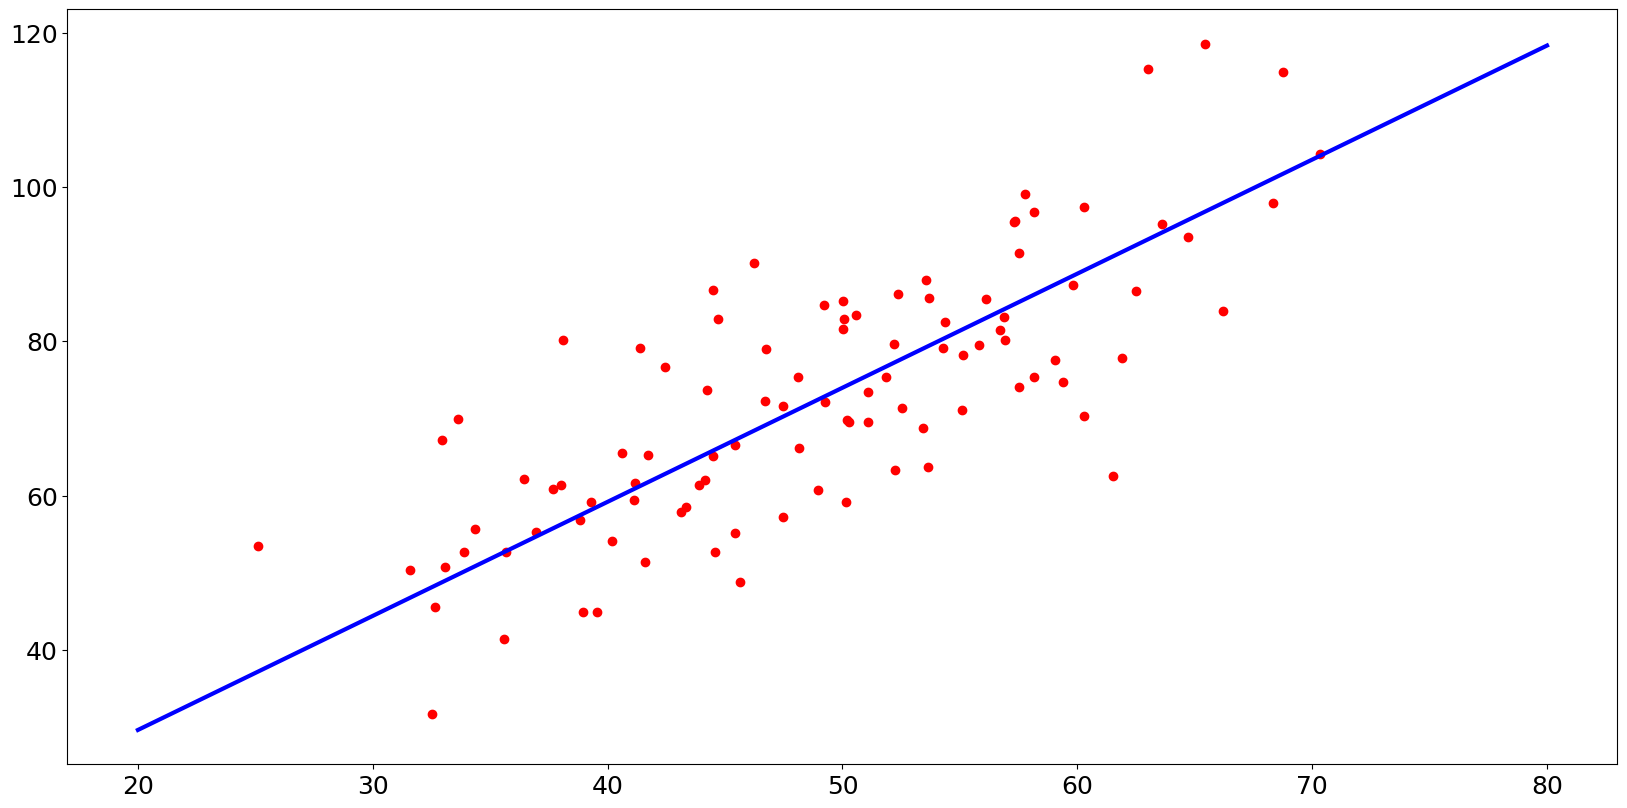

In [46]:
run()